In [35]:
from PIL import Image

# Specify the path to the bitmap file
bitmap_path = "result.bmp"

# Open the bitmap file
bitmap_image = Image.open(bitmap_path)

# Display some information about the image
print("Image format:", bitmap_image.format)
print("Image size:", bitmap_image.size)
print("Image mode:", bitmap_image.mode)

# Separate the image into four colors
colors = bitmap_image.split()

# bitmap_image.show()
# display the first color
# colors[1].show()

# Get a matrix of the pixel values in the image
# pixel_matrix = bitmap_image.load()
# print("Pixel at (0, 0):", pixel_matrix[0, 0])



# # Crop the image
cropped_image = bitmap_image.crop((440, 130, 600, 260))

cropped_image.show()

# # Save the cropped image
cropped_image.save("cropped.bmp")


Image format: BMP
Image size: (950, 556)
Image mode: RGB


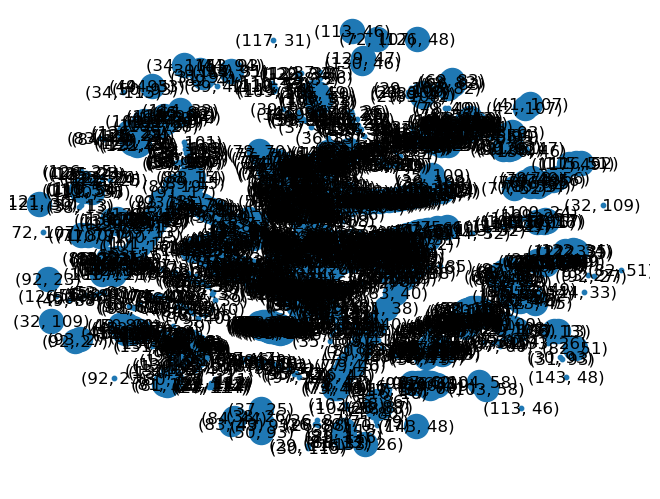

In [37]:
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt

def is_green(pixel):
    # Define what you consider as "green"
    # This can be adjusted based on the specific shade of green in the image
    return pixel[0] < 100 and pixel[1] > 150 and pixel[2] < 100

def is_orange(pixel):
    # Define what you consider as "orange"
    # This can be adjusted based on the specific shade of orange in the image
    return pixel[0] > 200 and pixel[1] > 100 and pixel[2] < 100

def add_edges(graph, node, neighbors):
    for neighbor in neighbors:
        if neighbor in graph:
            graph.add_edge(node, neighbor)

def build_graph_from_image(file_path):
    # Load the image
    image = Image.open(file_path)
    pixels = image.load()
    width, height = image.size

    # Create a graph
    graph = nx.Graph()

    # Process each pixel
    for x in range(width):
        for y in range(height):
            if is_orange(pixels[x, y]):
                node = (x, y)
                graph.add_node(node)
                # Check for neighbors within 2 pixels distance
                neighbors = [(x + dx, y + dy) for dx in range(-2, 3) for dy in range(-2, 3) if (dx, dy) != (0, 0)]
                add_edges(graph, node, neighbors)

    return graph

# Path to your image
image_path = 'cropped.bmp'

# Build the graph
G = build_graph_from_image(image_path)

# Draw the graph (this can be very dense and might not be very informative visually for large images)
nx.draw(G, with_labels=True)
# Make the nodes smaller and the plot less cluttered
nx.draw(G, with_labels=True, node_size=10)

plt.show()


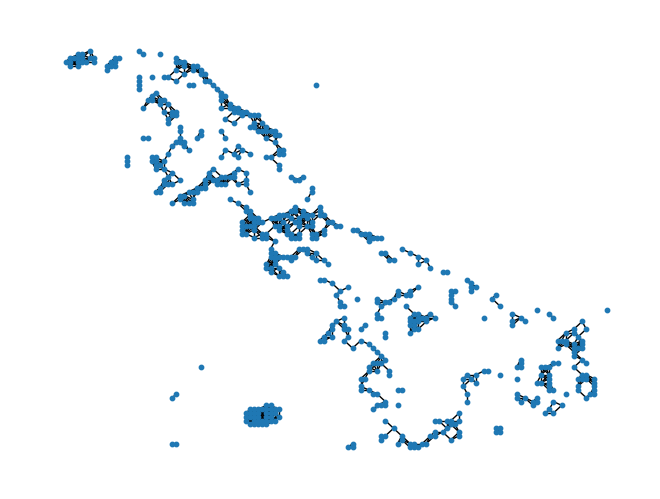

In [41]:
# Clear the plot
plt.clf()
# Draw them with the position based on the pixel coordinates
nx.draw(G, pos=dict((n, n) for n in G.nodes()), with_labels=False, node_size=10)
plt.show()


In [43]:
len(G.nodes)

603